# Comparing Models in Classifying Benign vs Malignant Melanoma

#### Alex Zhuang, Damian Gibson, Evan Shahrestany


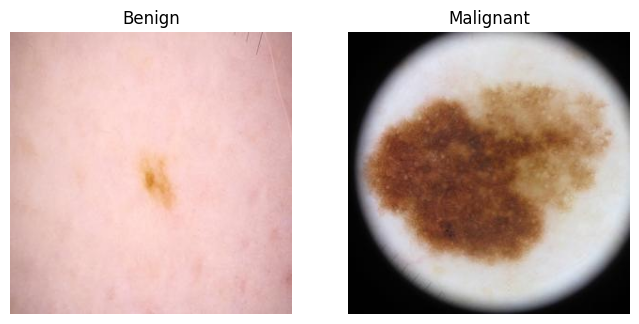

In [13]:
import random
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import os
import kagglehub

# Download the dataset from Kaggle
path = kagglehub.dataset_download("hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images")
path = os.path.join(path, "melanoma_cancer_dataset")

# show example benign and example malignant melanoma image from dataset
example_benign = os.path.join(path, f"train/benign/melanoma_{random.randint(0,5000)}.jpg")
example_malignant = os.path.join(path, f"train/malignant/melanoma_{random.randint(5000,10000)}.jpg")

example_benign = mpimg.imread(example_benign)
example_malignant = mpimg.imread(example_malignant)

fig, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].imshow(example_benign)
ax[1].imshow(example_malignant)

ax[0].set_title("Benign")
ax[1].set_title("Malignant")

ax[0].axis("off")
ax[1].axis("off")

plt.show()


## Calculating a Lesion Mask
Before we can calculate any biomarkers individually, we need to create a binary mask around the lesion. The lesion mask should be a simple black & white (binary) image which is a white overlay on the lesion itself, and black outside the lesion. This lets us focus on the lesion itself to obtain biomarker data.


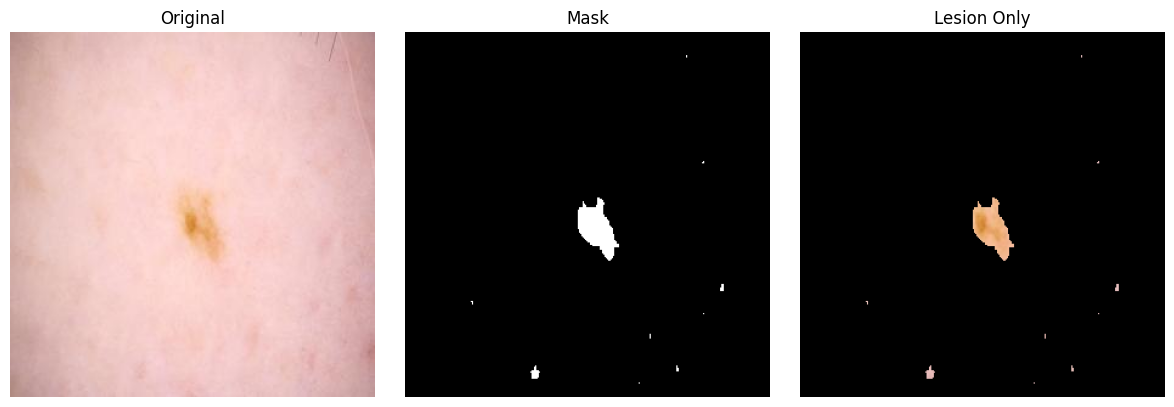

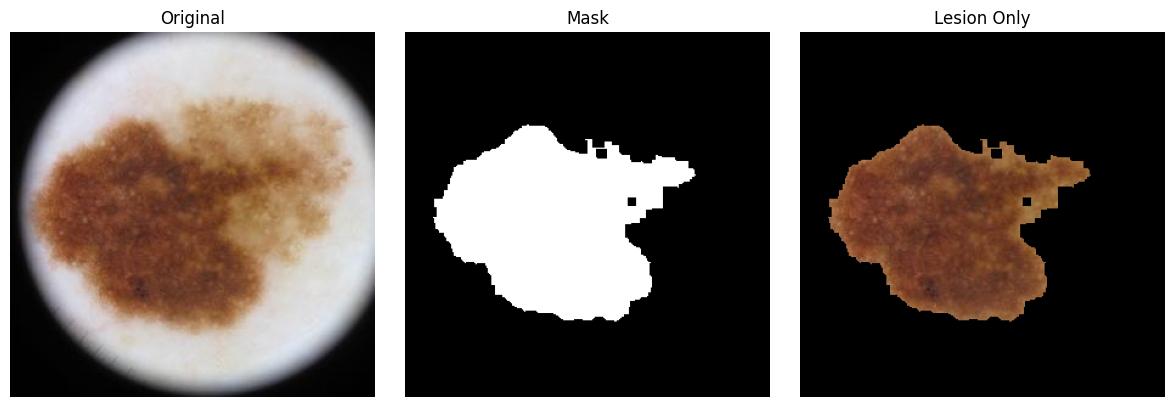

In [14]:
from helpers.lesion_mask import calc_threshold_mask as calc_lm

# Benign
mask = calc_lm(example_benign)
mask_np = mask.cpu().numpy().astype(bool) if hasattr(mask, "cpu") else mask.astype(bool)

lesion_only = example_benign.copy()
lesion_only[~mask_np] = 0  # zero out background

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(example_benign)
ax[0].set_title("Original")
ax[0].axis("off")

ax[1].imshow(mask_np, cmap="gray")
ax[1].set_title("Mask")
ax[1].axis("off")

ax[2].imshow(lesion_only)
ax[2].set_title("Lesion Only")
ax[2].axis("off")

plt.tight_layout()
plt.show()

# Malignant
mask_2 = calc_lm(example_malignant)
mask_2_np = mask_2.cpu().numpy().astype(bool) if hasattr(mask_2, "cpu") else mask_2.astype(bool)

lesion_only_2 = example_malignant.copy()
lesion_only_2[~mask_2_np] = 0  # zero out background

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(example_malignant)
ax[0].set_title("Original")
ax[0].axis("off")

ax[1].imshow(mask_2_np, cmap="gray")
ax[1].set_title("Mask")
ax[1].axis("off")

ax[2].imshow(lesion_only_2)
ax[2].set_title("Lesion Only")
ax[2].axis("off")

plt.tight_layout()
plt.show()
